In [10]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Exploring the Data

In [22]:
red_velvet = pd.read_csv('Red_Velvet_SongInfo.txt', sep=',')

red_velvet = red_velvet.drop('Unnamed: 0', axis=1)
red_velvet.head()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,The Perfect Red Velvet - The 2nd Album Repackage,1,5GKwq4sO5ZHKuWaDmdwMQc,Bad Boy,spotify:track:5GKwq4sO5ZHKuWaDmdwMQc,0.1910,0.714,0.736,0.000000,0.0553,-3.801,0.0457,149.985,0.814,72
1,The Perfect Red Velvet - The 2nd Album Repackage,2,2SahFuW1EZN9MXNVTkxv6F,All Right,spotify:track:2SahFuW1EZN9MXNVTkxv6F,0.1350,0.721,0.924,0.000000,0.0427,-3.071,0.0524,124.024,0.801,45
2,The Perfect Red Velvet - The 2nd Album Repackage,7,6AdhHZfTC4ep1b2v7L0Hfl,Time To Love,spotify:track:6AdhHZfTC4ep1b2v7L0Hfl,0.1400,0.410,0.654,0.000000,0.1260,-3.966,0.0670,184.736,0.341,46
3,Perfect Velvet - The 2nd Album,1,42tFTth2jcF7iSo0RBjfJF,피카부 Peek-A-Boo,spotify:track:42tFTth2jcF7iSo0RBjfJF,0.0868,0.839,0.902,0.002570,0.2720,-3.612,0.0536,114.953,0.639,68
4,Perfect Velvet - The 2nd Album,2,48Nd8rdc0WVG4rHTd76Mh6,봐 Look,spotify:track:48Nd8rdc0WVG4rHTd76Mh6,0.0792,0.761,0.785,0.000112,0.1420,-4.369,0.0520,111.037,0.780,48


In [23]:
red_velvet.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000
mean,3.971429,0.202230,0.673143,0.770071,0.000727,0.200029,-4.209114,0.094880,133.340957,0.634804,47.90000
std,2.413557,0.213009,0.101537,0.154706,0.003844,0.135059,1.230675,0.076104,27.721050,0.221557,9.93041
min,1.000000,0.002800,0.410000,0.318000,0.000000,0.042700,-7.321000,0.026900,79.986000,0.081300,30.00000
25%,2.000000,0.043625,0.609500,0.719500,0.000000,0.100250,-4.828750,0.043875,114.965250,0.494000,41.25000
50%,4.000000,0.137500,0.700500,0.794500,0.000000,0.160500,-4.183500,0.068450,128.009500,0.662000,45.00000
75%,6.000000,0.234500,0.740750,0.887000,0.000017,0.280500,-3.445500,0.123000,152.306500,0.813500,55.00000
max,10.000000,0.878000,0.897000,0.984000,0.031200,0.714000,-0.984000,0.399000,199.656000,0.964000,73.00000


In [24]:
red_velvet.album.unique()

array(['The Perfect Red Velvet - The 2nd Album Repackage',
       'Perfect Velvet - The 2nd Album',
       'The Velvet - The 2nd Mini Album', 'The Red - The 1st Album',
       '‘The ReVe Festival’ Day 2', 'Hotel Del Luna OST Part.8',
       '‘The ReVe Festival’ Day 1', 'SAPPY', 'Power Up (Japanese Ver.)',
       'Close To Me (Red Velvet Remix)', 'Sayonara',
       'RBB - The 5th Mini Album', 'Summer Magic - Summer Mini Album',
       '#Cookie Jar'], dtype=object)

# Comparing Full Albums

In [58]:
album_list = ['The Red - The 1st Album', 'Perfect Velvet - The 2nd Album', 'The Perfect Red Velvet - The 2nd Album Repackage']
albums = red_velvet.loc[red_velvet['album'].isin(album_list)]
albums.head()
# albums.album.unique()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,The Perfect Red Velvet - The 2nd Album Repackage,1,5GKwq4sO5ZHKuWaDmdwMQc,Bad Boy,spotify:track:5GKwq4sO5ZHKuWaDmdwMQc,0.1910,0.714,0.736,0.000000,0.0553,-3.801,0.0457,149.985,0.814,72
1,The Perfect Red Velvet - The 2nd Album Repackage,2,2SahFuW1EZN9MXNVTkxv6F,All Right,spotify:track:2SahFuW1EZN9MXNVTkxv6F,0.1350,0.721,0.924,0.000000,0.0427,-3.071,0.0524,124.024,0.801,45
2,The Perfect Red Velvet - The 2nd Album Repackage,7,6AdhHZfTC4ep1b2v7L0Hfl,Time To Love,spotify:track:6AdhHZfTC4ep1b2v7L0Hfl,0.1400,0.410,0.654,0.000000,0.1260,-3.966,0.0670,184.736,0.341,46
3,Perfect Velvet - The 2nd Album,1,42tFTth2jcF7iSo0RBjfJF,피카부 Peek-A-Boo,spotify:track:42tFTth2jcF7iSo0RBjfJF,0.0868,0.839,0.902,0.002570,0.2720,-3.612,0.0536,114.953,0.639,68
4,Perfect Velvet - The 2nd Album,2,48Nd8rdc0WVG4rHTd76Mh6,봐 Look,spotify:track:48Nd8rdc0WVG4rHTd76Mh6,0.0792,0.761,0.785,0.000112,0.1420,-4.369,0.0520,111.037,0.780,48


In [70]:
# most popular songs
albums[['album', 'name', 'popularity']].sort_values('popularity', ascending=False)

,album,name,popularity
0,The Perfect Red Velvet - The 2nd Album Repackage,Bad Boy,72
3,Perfect Velvet - The 2nd Album,피카부 Peek-A-Boo,68
20,The Red - The 1st Album,Dumb Dumb,62
6,Perfect Velvet - The 2nd Album,Kingdom Come,49
4,Perfect Velvet - The 2nd Album,봐 Look,48
5,Perfect Velvet - The 2nd Album,I Just,48
2,The Perfect Red Velvet - The 2nd Album Repackage,Time To Love,46
24,The Red - The 1st Album,Oh Boy,46
1,The Perfect Red Velvet - The 2nd Album Repackage,All Right,45
23,The Red - The 1st Album,Red Dress,44


In [25]:
the_red = red_velvet[red_velvet['album'] == 'The Red - The 1st Album']
the_red.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,0.114728,0.732600,0.800500,0.000002,0.160500,-3.729600,0.087700,114.684400,0.647000,44.400000
std,3.02765,0.170669,0.080547,0.105272,0.000004,0.107368,1.017643,0.060703,25.734631,0.163657,6.397916
min,1.00000,0.007880,0.595000,0.580000,0.000000,0.043800,-4.996000,0.037900,89.991000,0.366000,41.000000
25%,3.25000,0.028950,0.704250,0.745000,0.000000,0.061625,-4.480750,0.047975,99.205000,0.541250,41.000000
50%,5.50000,0.037800,0.743000,0.813500,0.000000,0.143500,-4.092500,0.065450,105.506000,0.661500,42.500000
75%,7.75000,0.105900,0.759000,0.877000,0.000002,0.227250,-2.817500,0.102200,118.751250,0.786500,43.750000
max,10.00000,0.565000,0.897000,0.941000,0.000014,0.329000,-2.273000,0.235000,171.930000,0.851000,62.000000


In [35]:
the_red
# the_red['energy']

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
20,The Red - The 1st Album,1,64iDjAuWDogVhuoWhKklF9,Dumb Dumb,spotify:track:64iDjAuWDogVhuoWhKklF9,0.03340,0.778,0.789,0.000002,0.2250,-4.297,0.0503,145.990,0.799,62
21,The Red - The 1st Album,2,1LNFbKyhjwOk7eeBUVqvo3,Huff n Puff,spotify:track:1LNFbKyhjwOk7eeBUVqvo3,0.02810,0.744,0.892,0.000000,0.0563,-2.500,0.0806,103.988,0.812,43
22,The Red - The 1st Album,3,7zevDPGnHofmT4sXeKW7QH,Campfire,spotify:track:7zevDPGnHofmT4sXeKW7QH,0.03150,0.714,0.721,0.000000,0.1080,-4.024,0.1040,89.991,0.455,41
23,The Red - The 1st Album,4,0ItGyAARjZ8tYxRjcDmgkt,Red Dress,spotify:track:0ItGyAARjZ8tYxRjcDmgkt,0.00788,0.763,0.856,0.000014,0.3290,-4.161,0.0419,120.001,0.615,44
24,The Red - The 1st Album,5,3ts0OSZgdjOP0Uu1DvQK4h,Oh Boy,spotify:track:3ts0OSZgdjOP0Uu1DvQK4h,0.01760,0.701,0.766,0.000000,0.2280,-4.542,0.0472,93.990,0.366,46
25,The Red - The 1st Album,6,6f48SDPW5xu6gUsfLaHOZi,Lady's Room,spotify:track:6f48SDPW5xu6gUsfLaHOZi,0.56500,0.742,0.738,0.000000,0.3050,-4.835,0.0379,107.024,0.851,41
26,The Red - The 1st Album,7,7q2qLI13TejYkBr4A5ZhEJ,Time Slip,spotify:track:7q2qLI13TejYkBr4A5ZhEJ,0.04220,0.897,0.580,0.000003,0.0578,-4.996,0.0503,99.982,0.590,43
27,The Red - The 1st Album,8,6RKpcgjYeiC5crivVGNNrZ,Don't U Wait No More,spotify:track:6RKpcgjYeiC5crivVGNNrZ,0.22200,0.595,0.838,0.000000,0.0731,-2.273,0.2350,98.946,0.749,41
28,The Red - The 1st Album,9,74muMkVdMYoR65lhmdzy13,Day 1,spotify:track:74muMkVdMYoR65lhmdzy13,0.11200,0.645,0.884,0.000000,0.1790,-2.801,0.0968,171.930,0.708,42
29,The Red - The 1st Album,10,1VfZX787b6l88hpvOXcSXp,Cool World,spotify:track:1VfZX787b6l88hpvOXcSXp,0.08760,0.747,0.941,0.000000,0.0438,-2.867,0.1330,115.002,0.525,41


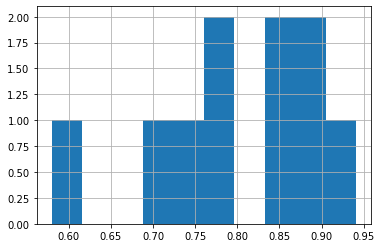

In [36]:
the_red['energy'].hist()

In [26]:
perfect_red = red_velvet[red_velvet['album'] == 'Perfect Velvet - The 2nd Album']
perfect_red.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.000000,0.274889,0.713111,0.733333,0.000306,0.182289,-4.451889,0.092356,131.540000,0.675556,47.111111
std,2.738613,0.252071,0.095742,0.128256,0.000850,0.113110,0.883077,0.072046,32.328344,0.167468,8.417904
min,1.000000,0.022000,0.572000,0.482000,0.000000,0.056500,-5.878000,0.026900,94.999000,0.320000,41.000000
25%,3.000000,0.086800,0.634000,0.743000,0.000000,0.091000,-4.619000,0.051400,111.037000,0.639000,42.000000
50%,5.000000,0.162000,0.709000,0.759000,0.000002,0.142000,-4.369000,0.053600,121.900000,0.678000,44.000000
75%,7.000000,0.560000,0.774000,0.785000,0.000060,0.272000,-3.838000,0.120000,149.998000,0.780000,48.000000
max,9.000000,0.654000,0.839000,0.902000,0.002570,0.364000,-3.442000,0.216000,191.908000,0.906000,68.000000


In [28]:
perfect_red

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
3,Perfect Velvet - The 2nd Album,1,42tFTth2jcF7iSo0RBjfJF,피카부 Peek-A-Boo,spotify:track:42tFTth2jcF7iSo0RBjfJF,0.0868,0.839,0.902,0.002570,0.2720,-3.612,0.0536,114.953,0.639,68
4,Perfect Velvet - The 2nd Album,2,48Nd8rdc0WVG4rHTd76Mh6,봐 Look,spotify:track:48Nd8rdc0WVG4rHTd76Mh6,0.0792,0.761,0.785,0.000112,0.1420,-4.369,0.0520,111.037,0.780,48
5,Perfect Velvet - The 2nd Album,3,7BuFMtIknd3ewai0zhKhqb,I Just,spotify:track:7BuFMtIknd3ewai0zhKhqb,0.5860,0.686,0.752,0.000002,0.3640,-3.442,0.0322,149.998,0.906,48
6,Perfect Velvet - The 2nd Album,4,5XJEdVQ5jl3C3dFsV7kCTZ,Kingdom Come,spotify:track:5XJEdVQ5jl3C3dFsV7kCTZ,0.2350,0.572,0.743,0.000006,0.0761,-3.991,0.1200,170.123,0.678,49
7,Perfect Velvet - The 2nd Album,5,6z8QDsRU25QbckFUajl553,두 번째 데이트 My Second Date,spotify:track:6z8QDsRU25QbckFUajl553,0.0890,0.832,0.759,0.000060,0.0565,-4.505,0.0751,94.999,0.767,44
8,Perfect Velvet - The 2nd Album,6,1ni3URO3waGQI8R6GNZ6sz,Attaboy,spotify:track:1ni3URO3waGQI8R6GNZ6sz,0.0220,0.774,0.785,0.000000,0.1380,-4.619,0.2160,104.959,0.646,42
9,Perfect Velvet - The 2nd Album,7,3OK4va42j6de25ZPNdI5kC,Perfect 10,spotify:track:3OK4va42j6de25ZPNdI5kC,0.5600,0.709,0.572,0.000000,0.3310,-5.878,0.0514,121.900,0.564,41
10,Perfect Velvet - The 2nd Album,8,2aSoUIBolhj734OqGn5ave,About Love,spotify:track:2aSoUIBolhj734OqGn5ave,0.1620,0.611,0.820,0.000000,0.1700,-3.838,0.2040,191.908,0.780,42
11,Perfect Velvet - The 2nd Album,9,1WryFxHMRpm6SOl58n8BYz,달빛 소리 Moonlight Melody,spotify:track:1WryFxHMRpm6SOl58n8BYz,0.6540,0.634,0.482,0.000000,0.0910,-5.813,0.0269,123.983,0.320,42


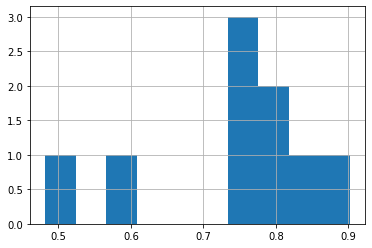

In [39]:
perfect_red['energy'].hist()

Text(0, 0.5, 'Energy')

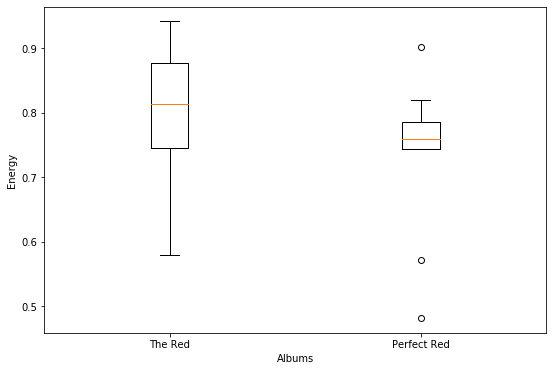

In [51]:
# Boxplot comparing the energy between the two albums

# combine the columns into a list
energy_to_plot = [the_red['energy'], perfect_red['energy']]

# Create figure instance
fig = plt.figure(1, figsize=(9,6))

# create an axes
ax = fig.add_subplot(111)

bp_energy = ax.boxplot(energy_to_plot)

ax.set_xticklabels(['The Red', 'Perfect Red'])
ax.set_xlabel('Albums')
ax.set_ylabel('Energy')

In [33]:
#T-stat
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

# Degrees of freedom
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [34]:
# Comparing the energy (measure from 0 to 1 which represnts a perceptual measure of intensite and activity) of red velvet's two full albums
# H0: there is no difference in the energy btwn the red and perfect_red
# Ha: there is!

t_stat_album_energy = welch_test_statistic(the_red['energy'], perfect_red['energy'])
print('Welch T-test Statistic: {:2.2f}'.format(t_stat_album_energy))

Welch T-test Statistic: 1.31


In [40]:
# degrees in freedom to determine which t-distribution to use
df = welch_satterhwaithe_df(the_red['energy'], perfect_red['energy'])
student_dist = stats.t(df)

In [42]:
p_value = 1-student_dist.cdf(t_stat_album_energy)
print('P-value for energy in the red is equal to energy in perfect red: {:2.2f}'.format(p_value))

P-value for energy in the red is equal to energy in perfect red: 0.10


The p-value is greater than my alpha (0.05), so I can't reject the null hypothesis that the energy in The Red (first album focused on the 'Red' concept) is equal to 'Perfect Red' (album focued on the 'Velvet' concept).

# Comparing EPs and Singles

In [59]:
ep_list = ['‘The ReVe Festival’ Day 2', 'Hotel Del Luna OST Part.8',
       '‘The ReVe Festival’ Day 1', 'SAPPY', 'Power Up (Japanese Ver.)',
       'Close To Me (Red Velvet Remix)', 'Sayonara',
       'RBB - The 5th Mini Album', 'Summer Magic - Summer Mini Album',
       '#Cookie Jar']
eps = red_velvet.loc[red_velvet['album'].isin(ep_list)]
eps.head()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
30,‘The ReVe Festival’ Day 2,1,5qSoW3ewNlhRN3FNZPmVns,Umpah Umpah,spotify:track:5qSoW3ewNlhRN3FNZPmVns,0.0258,0.693,0.935,0.000000,0.4370,-3.306,0.0771,119.973,0.844,69
31,‘The ReVe Festival’ Day 2,2,5hBUsxIkIDPkBoJ7J3JuIh,Carpool,spotify:track:5hBUsxIkIDPkBoJ7J3JuIh,0.1870,0.711,0.823,0.000000,0.2080,-3.490,0.0790,122.122,0.701,58
32,‘The ReVe Festival’ Day 2,3,6H6pp6uVW33kAm6qSBnysf,Love Is The Way,spotify:track:6H6pp6uVW33kAm6qSBnysf,0.0359,0.831,0.633,0.000034,0.1250,-4.568,0.0498,119.931,0.921,58
33,‘The ReVe Festival’ Day 2,4,5ots8XAjbFfFm3yrqftWOF,Jumpin’,spotify:track:5ots8XAjbFfFm3yrqftWOF,0.0106,0.731,0.839,0.000000,0.3160,-3.981,0.1930,148.996,0.811,56
34,‘The ReVe Festival’ Day 2,5,73pkNaWK4N5QfkjabwW40s,Ladies Night,spotify:track:73pkNaWK4N5QfkjabwW40s,0.0895,0.598,0.883,0.000000,0.0731,-3.456,0.0792,115.023,0.705,56
